In [1]:
alias qstat /opt/pbs/bin/qstat 

In [2]:
import ase
import ase.io
import ase.visualize
import ase.calculators.vasp
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import mywrapper

In [4]:
atoms = ase.io.read('primitive.cif')
ase.visualize.view(atoms)

1


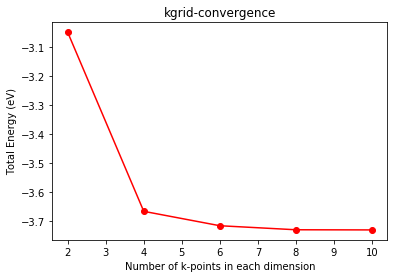

kpt | dE (meV/atom) | if converged?
----------------------------------------
  2         681.949     0
  4          64.129     0
  6          14.437     0
  8           0.526     1
 10           0.000     1


In [5]:
# get atoms object [Si unitcell]
atoms = ase.io.read('primitive.cif')

print(len(atoms.get_positions()))

# kpts convergence
kpts = [2,4,6,8,10]
energies = []

for kpt in kpts:
    
    # dir-name for this kpt calculation
    path = 'kgrid/%d' % (kpt)
        
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[kpt,kpt,kpt],
            encut=400,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False, 
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)

plt.figure(0)
plt.plot(kpts, energies, 'ro-')
plt.xlabel('Number of k-points in each dimension')
plt.ylabel('Total Energy (eV)')
plt.title('kgrid-convergence')
plt.show()

# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("kpt | dE (meV/atom) | if converged?")
print('-'*40)
for kpt,e in zip(kpts, energies):
    print('%3d %15.3f %5d' % (kpt, e, e<2))

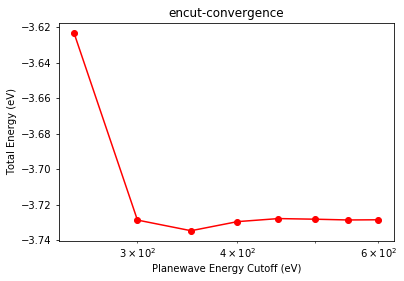

encut (eV) | dE (meV/atom) | if converged?
----------------------------------------
      250         105.365     0
      300           0.167     1
      350           6.175     0
      400           1.049     1
      450           0.673     1
      500           0.324     1
      550           0.109     1
      600           0.000     1


In [6]:
# encut convergence
encuts = [250,300,350,400,450,500,550,600]
energies = []

for encut in encuts:
    
    # dir-name for this encut calculation
    path = 'encut/%d' % (encut)
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=encut,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
    
plt.figure(1)
plt.semilogx(encuts, energies, 'ro-')
plt.xlabel('Planewave Energy Cutoff (eV)')
plt.ylabel('Total Energy (eV)')
plt.title('encut-convergence')
plt.show()

# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("encut (eV) | dE (meV/atom) | if converged?")
print('-'*40)
for encut,e in zip(encuts, energies):
    print('%9d %15.3f %5d' % (encut, e, e<2))

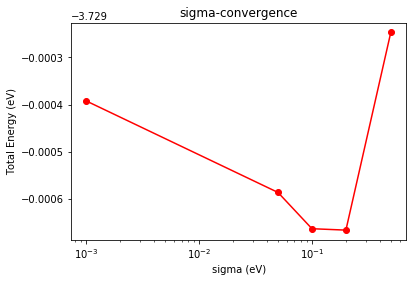

sigma (eV) | dE (meV/atom) | if converged?
----------------------------------------
    0.500           0.146     1
    0.200           0.274     1
    0.100           0.271     1
    0.050           0.194     1
    0.001           0.000     1


In [7]:
# sigma convergence
sigmas = [0.5, 0.2, 0.1, 0.05, 0.001]
energies = []

for sigma in sigmas:
    
    # dir-name for this kpt calculation
    path = 'sigma/%d' % (int(1000*sigma))
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[8,8,8],
            encut=400,
            ediff=1e-5,
            ismear=0,
            sigma=sigma,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
plt.figure(2)
plt.semilogx(sigmas, energies, 'ro-')
plt.xlabel('sigma (eV)')
plt.ylabel('Total Energy (eV)')
plt.title('sigma-convergence')
plt.show()    

# convert energies to meV/atom
natom = len(atoms.get_positions())
energies = abs(1000* (np.array(energies) - energies[-1])/natom)
print("sigma (eV) | dE (meV/atom) | if converged?")
print('-'*40)
for sigma,e in zip(sigmas, energies):
    print('%9.3f %15.3f %5d' % (sigma, e, e<2))

8


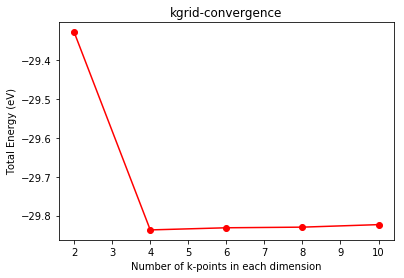

kpt | dE (meV/atom) | if converged?
----------------------------------------
   2          61.901     0
   4           1.702     1
   6           1.013     1
   8           0.810     1
  10           0.000     1


In [8]:
#---- kgrid and number of atoms --------------------------------
# check computational time for the primitive vs supercell case!

# get atoms object [Si unitcell]
atoms = ase.io.read('primitive.cif')
atoms *= (2,2,2)
print(len(atoms.get_positions()))

# kpts convergence
kpts = [2,4,6,8,10]
energies = []

for kpt in kpts:
    
    # dir-name for this kpt calculation
    path = 'kgrid_super/%d' % (kpt)
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[kpt,kpt,kpt],
            encut=400,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)

plt.figure(3)
plt.plot(kpts, energies, 'ro-')
plt.xlabel('Number of k-points in each dimension')
plt.ylabel('Total Energy (eV)')
plt.title('kgrid-convergence')
plt.show()

# energies in meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("kpt | dE (meV/atom) | if converged?")
print('-'*40)
for kpt,e in zip(kpts, energies):
     print('%4d %15.3f %5d' % (kpt, e, e<2))

In [ ]:
computational Cost = natom^4 nkpts^2

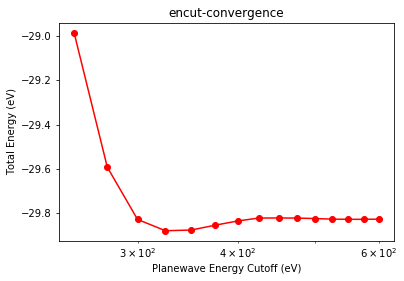

encut (eV) | dE (meV/atom) | if converged?
----------------------------------------
      250         105.366     0
      275          29.413     0
      300           0.167     1
      325           6.552     0
      350           6.175     0
      375           3.426     0
      400           1.049     1
      425           0.608     1
      450           0.673     1
      475           0.612     1
      500           0.324     1
      525           0.020     1
      550           0.099     1
      575           0.095     1
      600           0.000     1


In [9]:
# encut convergence on supercell -> any effect?

encuts = [250,275, 300,325, 350,375, 400,425, 450,475, 500,525, 550, 575, 600]
energies = []

for encut in encuts:
    
    # dir-name for this kpt calculation
    path = 'encut_super/%d' % (encut)
    
    # set basic calculator
    calc = ase.calculators.vasp.Vasp(
            xc="pbe",
            kpts=[4,4,4],
            encut=encut,
            ediff=1e-5,
            ismear=0,
            sigma=0.05,
            lwave=False,            
            )
    
    atoms.set_calculator(calc)
    energy = mywrapper.get_energy(atoms, dir=path)
    energies.append(energy)
    
    
plt.figure(4)
plt.semilogx(encuts, energies, 'ro-')
plt.xlabel('Planewave Energy Cutoff (eV)')
plt.ylabel('Total Energy (eV)')
plt.title('encut-convergence')
plt.show()

# energies in meV/atom
natom = len(atoms.get_positions())
energies = abs(1000*(np.array(energies) - energies[-1])/natom)
print("encut (eV) | dE (meV/atom) | if converged?")
print('-'*40)
for encut,e in zip(encuts, energies):
     print('%9d %15.3f %5d' % (encut, e, e<2))